In [1]:
#importing libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from time import sleep
from random import randint
from matplotlib import pyplot as plt
import seaborn as sns
import tkinter
from tkinter import *
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\hp\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
Movie_Name = []
Time = []
Year =[]
Genre = []
Rating = []
Description = []
Director = []
Cast = []
Stars = []
Gross = []

In [3]:
pages = np.arange(1,1000,100)

In [4]:
for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item-content'})
    sleep(randint(2,8))
    for store in movie_data:
        name = store.h3.a.text
        Movie_Name.append(name)
        
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text
        Year.append(year_of_release)
        
        runtime = store.p.find("span", class_ = 'runtime').text
        Time.append(runtime)
        
        genre = store.p.find("span", class_ = 'genre').text.replace('\n', '')
        Genre.append(genre)
        
        rating = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
        Rating.append(rating)
        
        describe = store.find_all('p', class_ = 'text-muted')
        description = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
        Description.append(description)
        
        cast = store.find("p", class_ = '')
        cast = cast.text.replace('\n', '').split('|')
        cast = [x.strip() for x in cast]
        cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
        Director.append(cast[0])
        Stars.append([x.strip() for x in cast[1].split(",")])
        
        gross = store.find('span', class_ = 'text-muted').text
        Gross.append(gross)
        
        
movie_list = pd.DataFrame({ "MovieName": Movie_Name, "Year of Release" : Year, "Watch Time": Time , "Genre" : Genre , "Rating" : Rating, "Description" :  Description, "Director" : Director, "Cast" : Stars, "Gross" : Gross})
    

In [5]:
movie_list['SerialNumber'] = range(1, 1+len(movie_list))
movie_list.to_csv('Scraped Data.csv')
movie_list.head(5)

,MovieName,Year of Release,Watch Time,Genre,Rating,Description,Director,Cast,Gross,SerialNumber
0,The Shawshank Redemption,(1994),142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",(1994),1
1,The Godfather,(1972),175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",(1972),2
2,The Dark Knight,(2008),152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",(2008),3
3,The Lord of the Rings: The Return of the King,(2003),201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",(2003),4
4,Schindler's List,(1993),195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",(1993),5


In [6]:
movie_list

,MovieName,Year of Release,Watch Time,Genre,Rating,Description,Director,Cast,Gross,SerialNumber
0,The Shawshank Redemption,(1994),142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",(1994),1
1,The Godfather,(1972),175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",(1972),2
2,The Dark Knight,(2008),152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",(2008),3
3,The Lord of the Rings: The Return of the King,(2003),201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",(2003),4
4,Schindler's List,(1993),195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",(1993),5
...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,(1954),113 min,"Comedy, Drama, Romance",7.6,A playboy becomes interested in the daughter o...,Billy Wilder,"[Humphrey Bogart, Audrey Hepburn, William Hold...",(1954),996
996,From Here to Eternity,(1953),118 min,"Drama, Romance, War",7.6,"At a U.S. Army base in 1941 Hawaii, a private ...",Fred Zinnemann,"[Burt Lancaster, Montgomery Clift, Deborah Ker...",(1953),997
997,Snow White and the Seven Dwarfs,(1937),83 min,"Animation, Adventure, Family",7.6,Exiled into the dangerous forest by her wicked...,"Directors:William Cottrell, David Hand, Wilfre...","[Adriana Caselotti, Harry Stockwell, Lucille L...",(1937),998
998,The 39 Steps,(1935),86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,"[Robert Donat, Madeleine Carroll, Lucie Mannhe...",(1935),999


In [7]:
movie_list.shape

(1000, 10)

In [8]:
movie_list.dropna(how='all', axis=1, inplace=True)
movie_list

,MovieName,Year of Release,Watch Time,Genre,Rating,Description,Director,Cast,Gross,SerialNumber
0,The Shawshank Redemption,(1994),142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",(1994),1
1,The Godfather,(1972),175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",(1972),2
2,The Dark Knight,(2008),152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",(2008),3
3,The Lord of the Rings: The Return of the King,(2003),201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",(2003),4
4,Schindler's List,(1993),195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",(1993),5
...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,(1954),113 min,"Comedy, Drama, Romance",7.6,A playboy becomes interested in the daughter o...,Billy Wilder,"[Humphrey Bogart, Audrey Hepburn, William Hold...",(1954),996
996,From Here to Eternity,(1953),118 min,"Drama, Romance, War",7.6,"At a U.S. Army base in 1941 Hawaii, a private ...",Fred Zinnemann,"[Burt Lancaster, Montgomery Clift, Deborah Ker...",(1953),997
997,Snow White and the Seven Dwarfs,(1937),83 min,"Animation, Adventure, Family",7.6,Exiled into the dangerous forest by her wicked...,"Directors:William Cottrell, David Hand, Wilfre...","[Adriana Caselotti, Harry Stockwell, Lucille L...",(1937),998
998,The 39 Steps,(1935),86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,"[Robert Donat, Madeleine Carroll, Lucie Mannhe...",(1935),999


In [9]:
movie_list.isnull().sum()

MovieName          0
Year of Release    0
Watch Time         0
Genre              0
Rating             0
Description        0
Director           0
Cast               0
Gross              0
SerialNumber       0
dtype: int64

In [10]:
movie_list.head()


,MovieName,Year of Release,Watch Time,Genre,Rating,Description,Director,Cast,Gross,SerialNumber
0,The Shawshank Redemption,(1994),142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",(1994),1
1,The Godfather,(1972),175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",(1972),2
2,The Dark Knight,(2008),152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",(2008),3
3,The Lord of the Rings: The Return of the King,(2003),201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",(2003),4
4,Schindler's List,(1993),195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",(1993),5


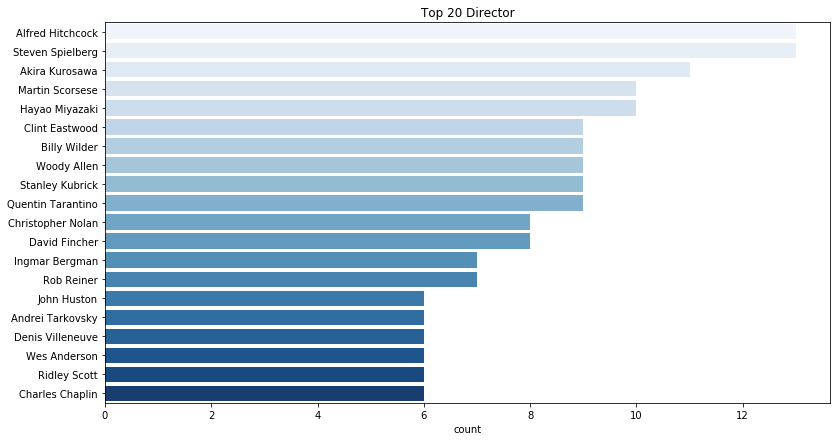

In [11]:
#Directors
Director = movie_list[movie_list.Director != 'No Director'].set_index('MovieName').Director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 20 Director')
sns.countplot(y = Director, order=Director.value_counts().index[:20], palette='Blues')
plt.show()

Text(0.5, 1.0, 'Rating')

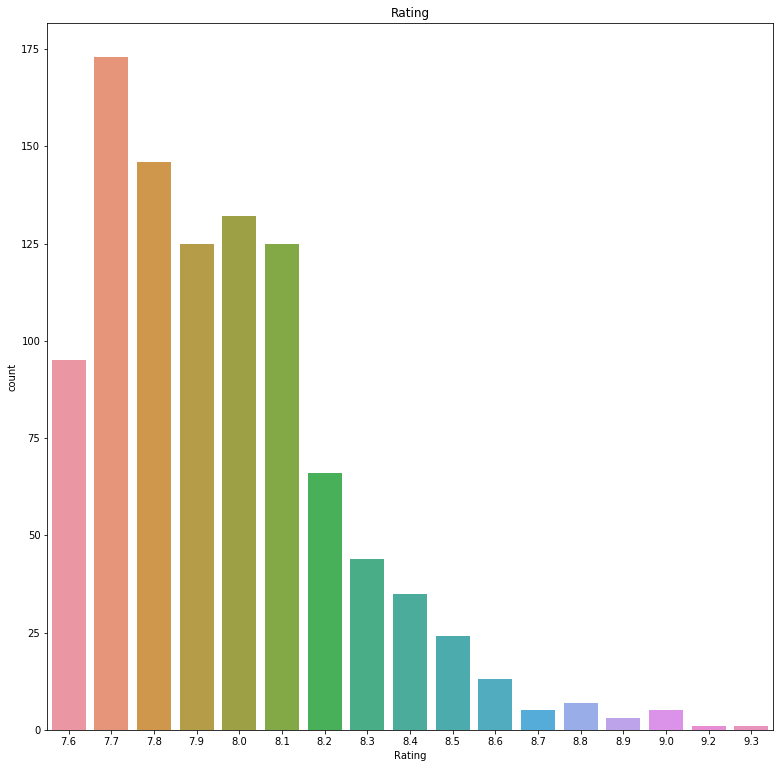

In [12]:
#Rating of movies
sns.countplot(movie_list['Rating'])
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')


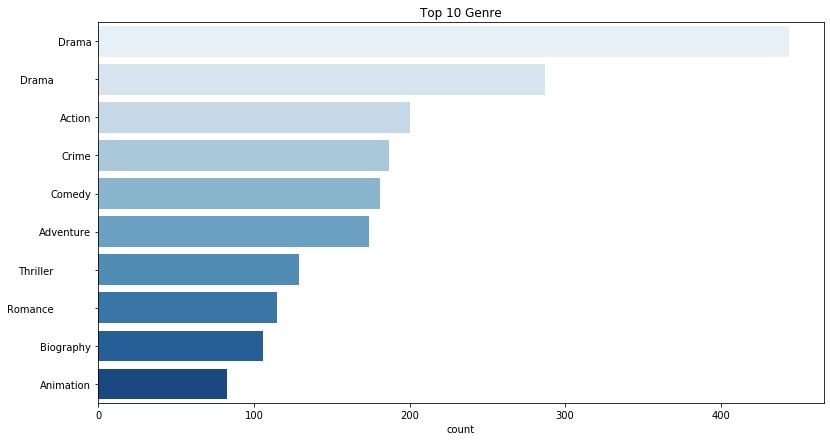

In [13]:
Genre = movie_list[movie_list.Genre != 'No Genre'].set_index('MovieName').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Genre')
sns.countplot(y = Genre, order=Genre.value_counts().index[:10], palette='Blues')
plt.show()

In [14]:
# selecting the relevant features for recommendation

selected_features = ['Genre','Description','Cast','Director','MovieName']
print(selected_features)

# replacing the null valuess with null string

for feature in selected_features:
  movie_list[feature] = movie_list[feature].fillna('')

['Genre', 'Description', 'Cast', 'Director', 'MovieName']


In [15]:
# combining all the 5 selected features

combined_features = movie_list['Genre']+' '+movie_list['Description']+' '+str(movie_list['Cast'])+' '+movie_list['Director']+' '+movie_list['MovieName']

In [16]:
print(combined_features)

0      Drama             Two imprisoned men bond over...
1      Crime, Drama             The aging patriarch o...
2      Action, Crime, Drama             When the mena...
3      Action, Adventure, Drama             Gandalf a...
4      Biography, Drama, History             In Germa...
                             ...                        
995    Comedy, Drama, Romance             A playboy b...
996    Drama, Romance, War             At a U.S. Army...
997    Animation, Adventure, Family             Exile...
998    Crime, Mystery, Thriller             A man in ...
999    Horror, Sci-Fi             A scientist finds a...
Length: 1000, dtype: object


In [17]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)

In [18]:
print(feature_vectors)

  (0, 6108)	0.25227865022275686
  (0, 6780)	0.04500947367482344
  (0, 1667)	0.2381024095131599
  (0, 2642)	0.18183177414265445
  (0, 4735)	0.034962911545560776
  (0, 2035)	0.034962911545560776
  (0, 5)	0.034962911545560776
  (0, 3911)	0.034962911545560776
  (0, 1132)	0.034962911545560776
  (0, 4570)	0.034962911545560776
  (0, 3016)	0.034962911545560776
  (0, 6516)	0.034962911545560776
  (0, 2815)	0.034962911545560776
  (0, 5426)	0.034962911545560776
  (0, 1300)	0.034962911545560776
  (0, 121)	0.034962911545560776
  (0, 4158)	0.034962911545560776
  (0, 4046)	0.034962911545560776
  (0, 1116)	0.034962911545560776
  (0, 4087)	0.034962911545560776
  (0, 1970)	0.034962911545560776
  (0, 5754)	0.034962911545560776
  (0, 120)	0.034962911545560776
  (0, 4047)	0.034962911545560776
  (0, 6470)	0.034962911545560776
  :	:
  (999, 4475)	0.03844913717821262
  (999, 7234)	0.03844913717821262
  (999, 7475)	0.03844913717821262
  (999, 2145)	0.03844913717821262
  (999, 2091)	0.03844913717821262
  (999, 1

In [19]:
similarity = cosine_similarity(feature_vectors)

In [20]:
print (similarity)

[[1.         0.10749895 0.11072374 ... 0.08135763 0.0882419  0.11063503]
 [0.10749895 1.         0.13637947 ... 0.08082104 0.11138296 0.11508036]
 [0.11072374 0.13637947 1.         ... 0.08537581 0.14642311 0.10686765]
 ...
 [0.08135763 0.08082104 0.08537581 ... 1.         0.08348353 0.0855895 ]
 [0.0882419  0.11138296 0.14642311 ... 0.08348353 1.         0.14084112]
 [0.11063503 0.11508036 0.10686765 ... 0.0855895  0.14084112 1.        ]]


In [21]:
print (similarity.shape)

(1000, 1000)


In [22]:
movie_list

,MovieName,Year of Release,Watch Time,Genre,Rating,Description,Director,Cast,Gross,SerialNumber
0,The Shawshank Redemption,(1994),142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",(1994),1
1,The Godfather,(1972),175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",(1972),2
2,The Dark Knight,(2008),152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",(2008),3
3,The Lord of the Rings: The Return of the King,(2003),201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",(2003),4
4,Schindler's List,(1993),195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",(1993),5
...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,(1954),113 min,"Comedy, Drama, Romance",7.6,A playboy becomes interested in the daughter o...,Billy Wilder,"[Humphrey Bogart, Audrey Hepburn, William Hold...",(1954),996
996,From Here to Eternity,(1953),118 min,"Drama, Romance, War",7.6,"At a U.S. Army base in 1941 Hawaii, a private ...",Fred Zinnemann,"[Burt Lancaster, Montgomery Clift, Deborah Ker...",(1953),997
997,Snow White and the Seven Dwarfs,(1937),83 min,"Animation, Adventure, Family",7.6,Exiled into the dangerous forest by her wicked...,"Directors:William Cottrell, David Hand, Wilfre...","[Adriana Caselotti, Harry Stockwell, Lucille L...",(1937),998
998,The 39 Steps,(1935),86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,"[Robert Donat, Madeleine Carroll, Lucie Mannhe...",(1935),999


In [23]:


# creating a list with all the movie names given in the dataset

list_of_all_titles = movie_list['MovieName'].tolist()
print(list_of_all_titles)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Lord of the Rings: The Return of the King', "Schindler's List", 'The Godfather: Part II', '12 Angry Men', 'Jai Bhim', 'K.G.F: Chapter 2', 'Pulp Fiction', 'Everything Everywhere All at Once', 'Inception', 'The Lord of the Rings: The Two Towers', 'Fight Club', 'The Lord of the Rings: The Fellowship of the Ring', 'Forrest Gump', 'Il buono, il brutto, il cattivo', 'Soorarai Pottru', 'The Matrix', 'Goodfellas', 'The Empire Strikes Back', "One Flew Over the Cuckoo's Nest", 'Interstellar', 'Cidade de Deus', 'Sen to Chihiro no kamikakushi', 'Saving Private Ryan', 'The Green Mile', 'La vita è bella', 'Se7en', 'Terminator 2: Judgment Day', 'The Silence of the Lambs', 'Star Wars', 'Seppuku', 'Shichinin no samurai', "It's a Wonderful Life", 'Asuran', 'Gisaengchung', 'Whiplash', 'The Intouchables', 'Sardar Udham', 'The Prestige', 'The Departed', 'The Pianist', 'Gladiator', 'American History X', 'The Usual Suspects', 'Léon', 'The 

In [24]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : avangers


In [25]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['The Avengers']


In [26]:
close_match = find_close_match[0]
print(close_match)

The Avengers


In [27]:
# finding the index of the movie with title

index_of_the_movie = movie_list[movie_list.MovieName == close_match]['SerialNumber'].values[0]
print(index_of_the_movie)

361


In [28]:
similar_movies = list(enumerate(similarity[index_of_the_movie]))

In [29]:
len(similar_movies)

1000

In [30]:
sorted_similar_movies = sorted(similar_movies, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(361, 1.0000000000000073), (604, 0.22707071601027837), (290, 0.19256226367177254), (556, 0.18084286948124245), (752, 0.17580539036886855), (470, 0.17297566570764414), (327, 0.17122617098202214), (49, 0.1677072782890916), (956, 0.16242096685822396), (120, 0.16014210865646744), (743, 0.15906884252513506), (858, 0.15726672574882986), (345, 0.15477935742105745), (375, 0.15432190807764978), (748, 0.15412618725686492), (715, 0.15391183001286135), (826, 0.15356894060021414), (626, 0.15100921167645662), (101, 0.14978142102333358), (860, 0.14932705045905625), (756, 0.1487802269221656), (294, 0.1483998058543578), (295, 0.14789943375885536), (440, 0.1468284544782202), (386, 0.1467978248718639), (491, 0.1466417363060601), (605, 0.14626776982478967), (42, 0.14599995631151827), (593, 0.14553984885363988), (24, 0.14531559881385056), (815, 0.14513530821396306), (74, 0.14501253749759455), (409, 0.14447384726135498), (782, 0.14422444364658363), (228, 0.14278649992437537), (214, 0.142665921857619), (661

In [31]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  SerialNumber = movie[0]
  title_from_index = movie_list[movie_list.index==SerialNumber]['MovieName'].values[0]
  if (i<5):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Persepolis
2 . Loving Vincent
3 . The Message
4 . Doctor Zhivago


In [36]:
def Recommendation():
    
    movie_name = input(' Enter your favourite movie name : ')

    list_of_all_titles = movie_list['MovieName'].tolist()
    
    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

    close_match = find_close_match[0]

    index_of_the_movie = movie_list[movie_list.MovieName == close_match]['SerialNumber'].values[0]

    similarity_score = list(enumerate(similarity[index_of_the_movie]))

    sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

    print('Movies suggested for you : \n')

    i = 1

    for movie in sorted_similar_movies:
      SerialNumber = movie[0]
      title_from_index = movie_list[movie_list.index==SerialNumber]['MovieName'].values[0]
      if (i<6):
        print(i, '.',title_from_index)
        i+=1
Recommendation()  

 Enter your favourite movie name : sultan
Movies suggested for you : 

1 . The Fifth Element
2 . Star Trek
3 . Rogue One
4 . Léon
5 . V for Vendetta


In [ ]:

def gui1():
    
    window = tkinter.Tk()
    window.configure(bg='black')
    window.title('Recommendation System')
    width= window.winfo_screenwidth() 
    height= window.winfo_screenheight()
    window.geometry("%dx%d" % (width, height))
    
    
    lbl=Label(window, text="Recommendation System", fg='#FF0000', font=("Courier", 30), bg='black')    
    lbl.place(x=300, y=80)    
    lb2=Label(window, text="Enter Your Favourite Movie - ", fg='#778899', font=("Arial", 15, "bold") ,bg='black')     
    lb2.place(x=350, y=200)
    
              
    def get_value(): 
        
        
        e_text=txt.get()      
        u = "More like " + e_text + " - "
        

        list_of_all_titles = movie_list['MovieName'].tolist()
    
        find_close_match = difflib.get_close_matches(e_text, list_of_all_titles)

        close_match = find_close_match[0]

        index_of_the_movie = movie_list[movie_list.MovieName == close_match]['SerialNumber'].values[0]
        similar_movies = list(enumerate(similarity[index_of_the_movie]))

        similarity_score = list(enumerate(similarity[index_of_the_movie]))

        sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
        i = 0
        m = []
        for movie in sorted_similar_movies:
            index = movie[0]
            title_from_index = movie_list[movie_list.index==index]['MovieName'].values[0]
            if (i<6):
                m.append(title_from_index)
                i+=1
        n = "\n".join(m)
        

        
                
        
        
       
        lb3 = Label(window, text=u, font= ('Century 15 bold'),fg='#778899', bg = 'black')
        lb3.place(x = 800, y = 200)
        
        global lb4
        
        lb4 = Label(window, text=n, font= ('Century 15 bold'),fg='#FF0000', bg = 'black')
        lb4.place(x = 800, y = 250)

    txt = Entry(window, text="This is Entry Widget", bd=1, fg='black', bg='#778899' ,font=("Cursive", 20)) 
    
    txt.place(x=360, y=250, height=70, width=240)    
    
    btn = Button(window, text = "Submit", fg = "black",font=("Arial", 15, "bold"),bg = "#778899", command = get_value, )
    
    btn.place(x = 360, y = 340, height = "40", width = "100")
    
    def clear_text():        
        txt.delete(0, END)
        
        
        
    btn2 = Button(window, text = "Clear", fg = "black",font=("Arial", 15, "bold"),bg = "#778899", command = clear_text)    
    btn2.place(x = 500, y = 340, height = "40", width = "100")
    
    
    window.mainloop()
    
gui1()